#### Задание 1

Обозначим импульсную характеристику
$$h(t) = e^{-t} \cdot \cos(2\pi f t) \cdot u(t)$$

Передаточная функция получается из импульсной преобразованием Лапласа, т.е.
$$H(s) = \mathcal{L}(h(t)) = \int_{0}^{\infty} h(t) e^{-st} dt$$

Этот интеграл можно посчитать руками (через интегрирование по частям и сведение к исходному интегралу).
Но проще взять ответ из [wiki](https://en.wikipedia.org/wiki/Laplace_transform#Table_of_selected_Laplace_transforms) (exponentially decaying cosine wave).

$$H(s) = \frac{s + 1}{(s+1)^2 + (2\pi f)^2} = \frac{s + 1}{s^2 + 2s + 1 + 4\pi^2 f^2}$$

Я не знаю как построить график импульсной характеристики используя коэффициенты передаточной функции, поэтому просто график.

C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_11712\386054542.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


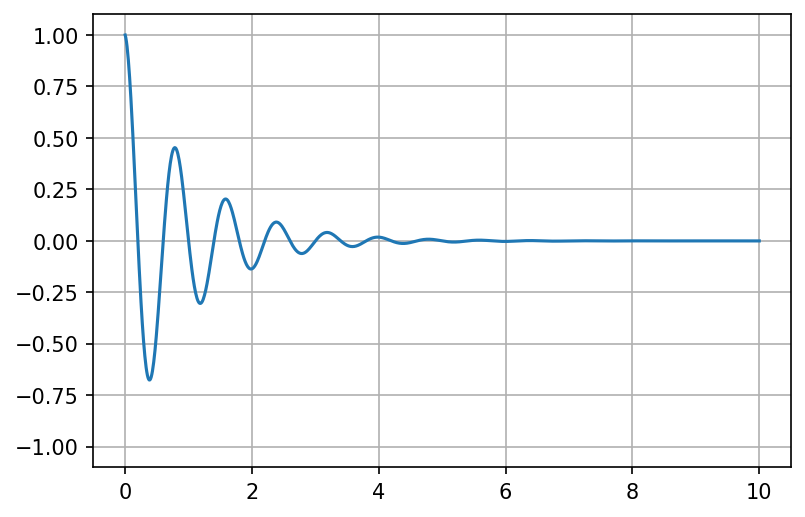

In [6]:
import matplotlib.pyplot as plt
import numpy as np

N = 5 # change to your variant/number in group
f = 0.25 * N

t = np.linspace(0, 10, 1000)
h = np.exp(-t) * np.cos(2 * np.pi * f * t)

fig, ax = plt.subplots(dpi=150)
ax.plot(t, h)
ax.set_ylim(-1.1, 1.1)
plt.grid()
fig.show()

#### Задание 2

Напомним как работают разные преобразования.

Есть аналоговый сигнал. Его мжно мыслить как непрерывную функцию от времени.

Есть дискретизированный (цифровой) сигнал. Это просто список\последовательность чисел.

Преобразование Лапласа применяется к аналоговому сигналу\непрерывной функции. Результат - функция комплексного переменного. Т.е. мы исходной функции сопоставляем функцию на (комплексной) плоскости.

Z-преобразование применяется к последовательности чисел. Результат - также функция комплексного переменного.

Билинейное преобразование ([wiki](https://en.wikipedia.org/wiki/Bilinear_transform)) переводит образ Лаплас-преобразования в образ Z-преобразования. Т.е. превращает одну из функций выше в другую.

Применим билинейное преобразование к $H(s)$.
Для этого сделаем замену
$$s = \frac{2}{T_s} \frac{z-1}{z+1}$$

$$H_d(z) = H\left(\frac{2}{T_s} \frac{z-1}{z+1}\right) = \frac{\frac{2}{T_s} \frac{z-1}{z+1} + 1}{(\frac{2}{T_s} \frac{z-1}{z+1})^2 + 2 \frac{2}{T_s} \frac{z-1}{z+1} + 1 + 4\pi^2 f^2}

Домножим числитель и знаменатель на $(T(z+1))^2$

$$\frac{2T_s (z^2 - 1) + T_s^2 (z+1)^2}{4(z-1)^2 + 4T_s (z^2 - 1) + 1 + 4\pi^2 f^2}$$

$$\frac{(T_s^2 + 2 T_s) \cdot z^2 + 2T_s^2 \cdot z + (T_s^2 - 2T_s)}{(4T_s + 4) \cdot z^2 - 8 \cdot z + (5 + 4\pi^2 f^2 -4T_s)}$$

#### Задание 3

Найдем нули и полюса передаточных функций.
Если передаточная функция - дробно-рациональная (т.е. отношение двух многочленов), но нужные нам нули - это нули числителя, а полюса - нули знаменателя.

$$H(s) = \frac{s + 1}{s^2 + 2s + 1 + 4\pi^2 f^2}$$



Нули: $-1$

Полюса: $-1 \pm 2\pi f$


$$H(z) = \frac{(T_s^2 + 2 T_s) \cdot z^2 + 2T_s^2 \cdot z + (T_s^2 - 2T_s)}{(4T_s + 4) \cdot z^2 - 8 \cdot z + (5 + 4\pi^2 f^2 -4T_s)}$$

У $H(z)$ нули в $-1$ и $\frac{2T_s-T_s^2}{2T_s+T_s^2}$
Полюса я не считал, т.к. квадратное уравнение и понятно как, но долго.

#### Задание 4

Построим АЧХ и ФЧХ для исходного аналогового сигнала.
Для этого в $H(s)$ подставим $s = j\omega$.
Полученная комплекснозначная функция от $\omega$ - это АФЧХ.
Её модуль - АЧХ, аргумент - ФЧХ.

$$H(j\omega) = \frac{j\omega + 1}{-\omega^2 + 2j\omega + 1 + \omega^2} = \frac{j\omega + 1}{2j\omega + 1} = \frac{(j\omega + 1)(1 - 2j\omega)}{1 + 4\omega^2} = \frac{1+2\omega^2-j\omega}{1+4\omega^2} = \frac{1 + 2\omega^2}{1+4\omega^2} - j \frac{\omega}{1+4\omega^2}$$

АЧХ (абсолютное значение):
$$FR(\omega) = \frac{\sqrt{1+5\omega^2+4\omega^4}}{1+4\omega^2}$$

In [11]:
def transfer_function(w: list[float]) -> list[float]:
    return (1 + 2 * w * w ) / (1 + 4 * w * w) - 1j * w / (1 + 4 * w * w)

C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_11712\3494561477.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


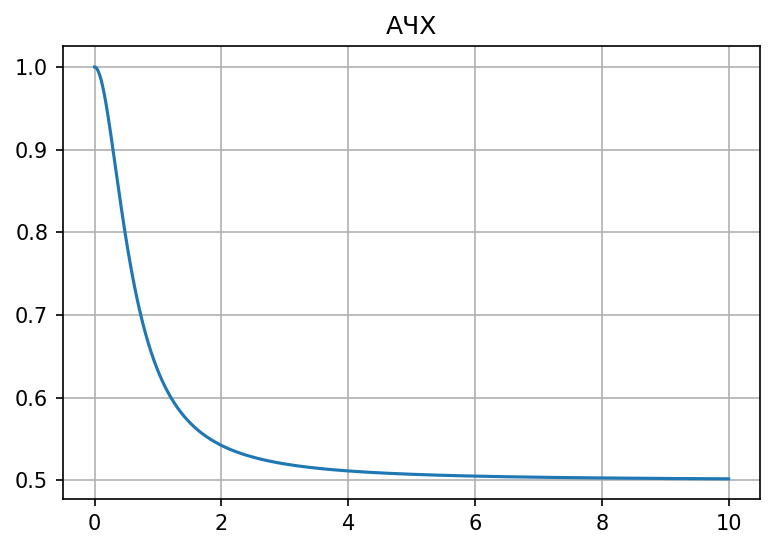

In [22]:
x = np.linspace(0, 10, 10_000)
y = np.absolute(transfer_function(x))

fig, ax = plt.subplots(dpi=150)
ax.plot(x, y)
# ax.set_ylim(-1.1, 1.1)
plt.grid()
plt.title("АЧХ")
fig.show()

C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_11712\3391506487.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


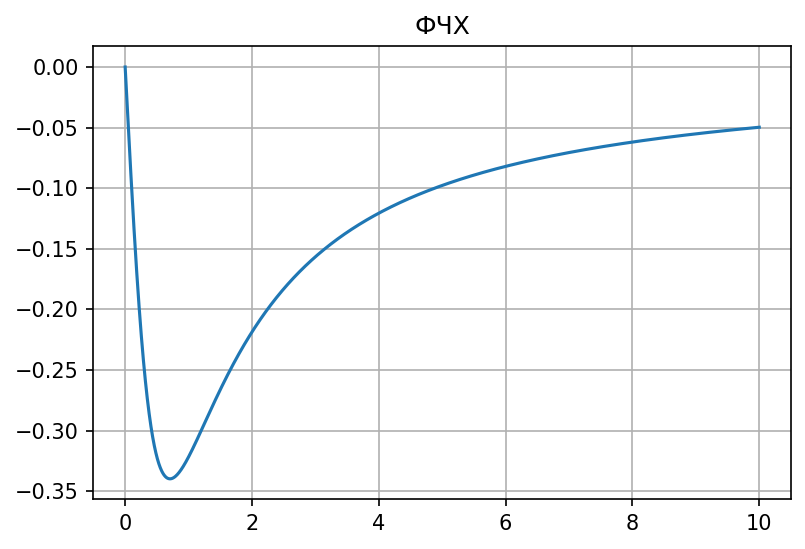

In [21]:
x = np.linspace(0, 10, 10_000)
y = np.angle(transfer_function(x))

fig, ax = plt.subplots(dpi=150)
ax.plot(x, y)

plt.grid()
plt.title("ФЧХ")
fig.show()

#### Задание 5

Построим передаточную фукцию от дискретного времени используя Z-преобразование.

Пусть $f_s$ - частота дискретизации, $T_s = \frac{1}{f_s}$ - период дискретизации

Дискретизируя $h(t)$ получаем последовательность
$$h[n] = e^{-n} \cdot \cos(2\pi f n) \cdot u[n]$$

Z-преобразование от $h[n]$ также не будем считать самостоятельно и возьмем из [wiki](https://en.wikipedia.org/wiki/Z-transform#Table_of_common_Z-transform_pairs)

$$H(z) = \frac{1 - e \cos(2\pi f) \cdot z^{-1}}{1 - 2e \cos(2\pi f) \cdot z^{-1} + e^2 \cdot z^{-2}}$$

Подставляя $f = 1.25$, получаем

$$H(z) = \frac{1}{1 + e^2 \cdot z^{-2}}$$